In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [3]:
train_data = pd.read_csv('../DATA/train.csv')
formula_train = pd.read_csv('../DATA/formula_train.csv')
test_data = pd.read_csv('../DATA/test.csv')
formula_test = pd.read_csv('../DATA/formula_test.csv')

In [4]:
final_train_data = pd.concat([train_data, formula_train.drop('critical_temp', axis=1)], axis=1)
final_test_data = pd.concat([test_data, formula_test], axis=1)

In [5]:
X = final_train_data.drop(['critical_temp', 'material'], axis=1).copy()
y = final_train_data.critical_temp

<Axes: xlabel='critical_temp', ylabel='entropy_atomic_mass'>

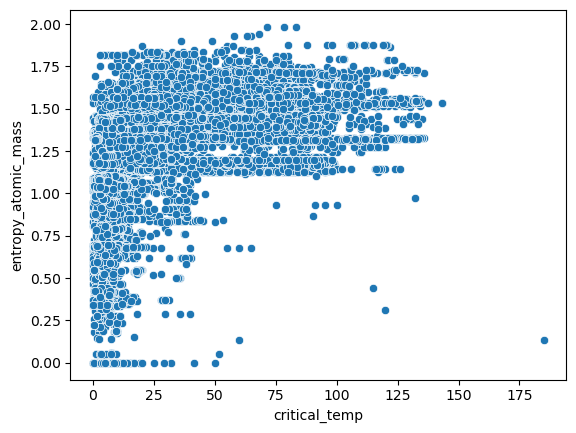

In [6]:
sns.scatterplot(data=final_train_data, x='critical_temp', y='entropy_atomic_mass')

# data training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pca = PCA(n_components=14)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Columns: 167 entries, number_of_elements to Rn
dtypes: float64(155), int64(12)
memory usage: 21.7 MB


In [14]:
pca_X_train

array([[-2.1668029 ,  1.35799535,  2.87012249, ..., -0.2335091 ,
        -0.59877635,  0.0633887 ],
       [-1.47260608,  1.89383013,  3.3236466 , ..., -0.9880365 ,
        -0.67185205, -0.01392162],
       [ 2.40853466, -1.87004519,  4.49009173, ..., -0.08226282,
        -2.24975066, -1.07700147],
       ...,
       [ 0.65089829, -3.66905624, -0.86561675, ...,  1.30651001,
        -0.21140272,  0.34493271],
       [ 5.17805212, -0.14941501, -2.63536812, ..., -0.32882382,
         0.06082133,  0.3521732 ],
       [-4.48069183,  0.89656033,  1.61338578, ...,  0.14120991,
         0.72984354,  1.17787875]])

# Model selection

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [17]:
def report(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y_test, pred))
    print('mean_absolute_error:', mean_absolute_error(y_test, pred))
    print('mean_squared_error:', np.sqrt(mean_squared_error(y_test, pred)))
    print('mean:', np.mean(y_test))
    sns.scatterplot(x=pred, y=y_test)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', ls='--')
    plt.xlabel('true_values')
    plt.ylabel('predict_values')

mean_absolute_percentage_error: 3.4621802620317186
mean_absolute_error: 6.504329923660669
mean_squared_error: 12.534921683640968
mean: 34.299561827573925


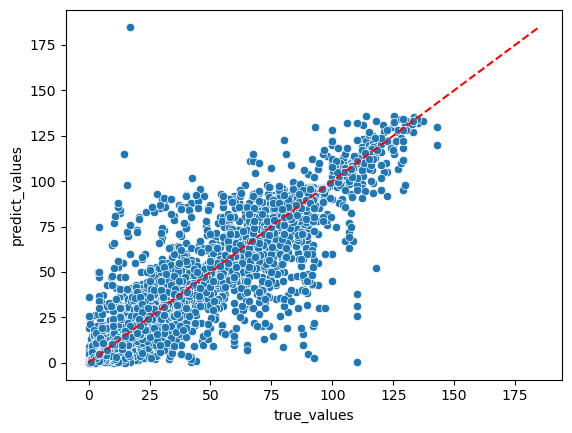

In [18]:
report(DecisionTreeRegressor())

mean_absolute_percentage_error: 3.3082639320085376
mean_absolute_error: 5.486096326121693
mean_squared_error: 9.772496073249583
mean: 34.299561827573925


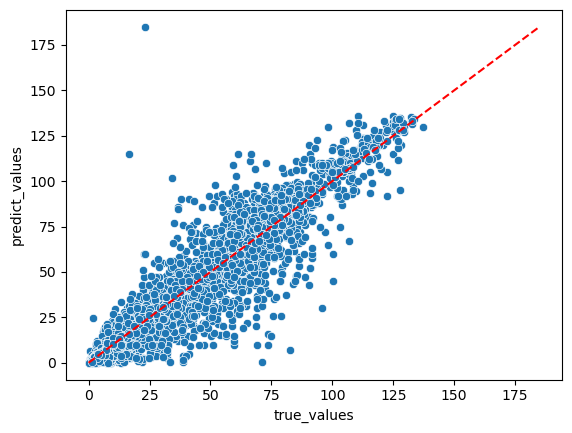

In [19]:
report(RandomForestRegressor())

mean_absolute_percentage_error: 6.655504932030439
mean_absolute_error: 10.738337868702162
mean_squared_error: 16.463260065821
mean: 34.299561827573925


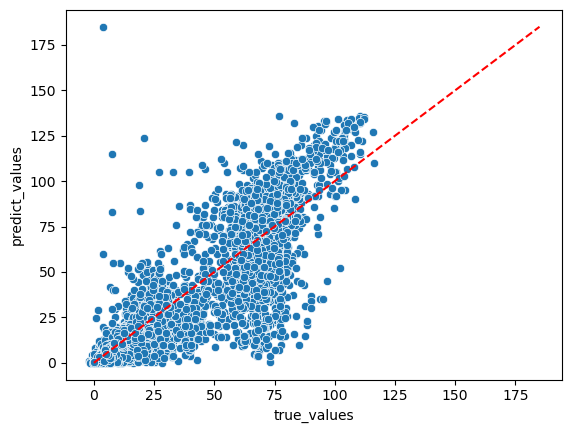

In [20]:
report(SVR())

mean_absolute_percentage_error: 2.9243343381559983
mean_absolute_error: 6.742452237085856
mean_squared_error: 11.9627296556552
mean: 34.299561827573925


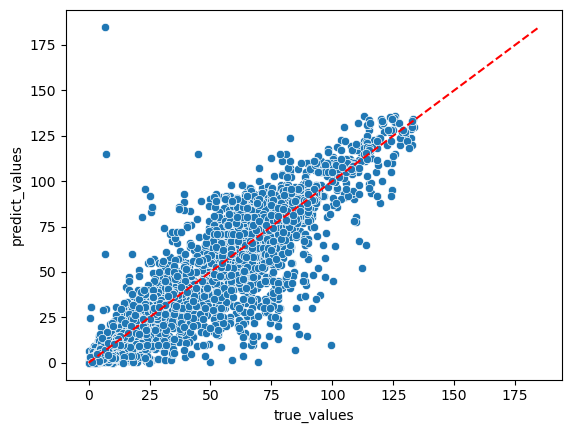

In [21]:
report(KNeighborsRegressor())

mean_absolute_percentage_error: 8.065617385905778
mean_absolute_error: 12.637767183853686
mean_squared_error: 17.41098829930465
mean: 34.299561827573925


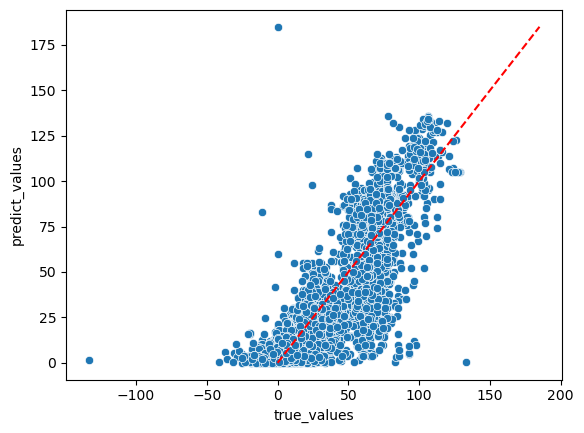

In [22]:
report(LinearRegression())

Learning rate set to 0.060138
0:	learn: 32.9108230	total: 166ms	remaining: 2m 46s
1:	learn: 31.4948305	total: 185ms	remaining: 1m 32s
2:	learn: 30.2038851	total: 198ms	remaining: 1m 5s
3:	learn: 28.9365163	total: 212ms	remaining: 52.7s
4:	learn: 27.7952941	total: 225ms	remaining: 44.7s
5:	learn: 26.7600658	total: 238ms	remaining: 39.4s
6:	learn: 25.7822816	total: 251ms	remaining: 35.6s
7:	learn: 24.9067971	total: 264ms	remaining: 32.7s
8:	learn: 24.1046806	total: 276ms	remaining: 30.4s
9:	learn: 23.2998589	total: 288ms	remaining: 28.6s
10:	learn: 22.5661482	total: 301ms	remaining: 27.1s
11:	learn: 21.8749168	total: 315ms	remaining: 25.9s
12:	learn: 21.2538235	total: 327ms	remaining: 24.8s
13:	learn: 20.6685145	total: 339ms	remaining: 23.9s
14:	learn: 20.1157493	total: 352ms	remaining: 23.1s
15:	learn: 19.6110825	total: 365ms	remaining: 22.4s
16:	learn: 19.1472886	total: 379ms	remaining: 21.9s
17:	learn: 18.6840298	total: 394ms	remaining: 21.5s
18:	learn: 18.3084440	total: 408ms	remaini

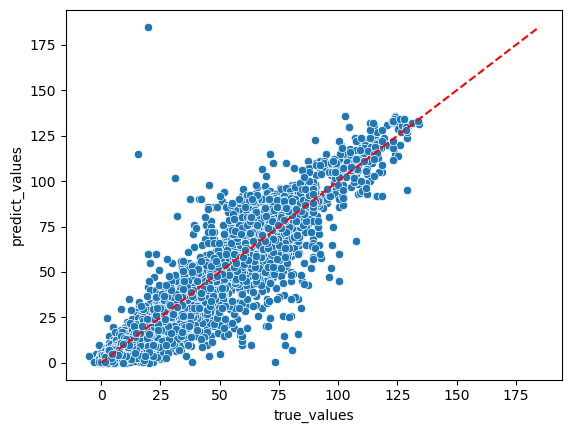

In [24]:
report(CatBoostRegressor())

# Final model

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from joblib import dump

In [88]:
class NewGenerator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed = X_transformed.drop('material', axis=1)
        return X_transformed

In [94]:
X_final = final_train_data.drop('critical_temp', axis=1)
y_final = final_train_data['critical_temp']

In [96]:
final_model = Pipeline([('NewGenerator', NewGenerator()),
                        ('scaler', StandardScaler()),
                        ('forest_model', RandomForestRegressor())])

In [98]:
final_model.fit(X_final, y_final)

Pipeline(steps=[('NewGenerator', NewGenerator()), ('scaler', StandardScaler()),
                ('forest_model', RandomForestRegressor())])

In [104]:
prediction = final_model.predict(final_test_data)

In [106]:
prediction

array([25.72261111, 25.24895833, 90.93061905, ...,  2.81561917,
        2.37529667,  2.37529667])

In [108]:
prediction = pd.DataFrame(prediction, final_test_data.index)

In [112]:
prediction = prediction.reset_index()

In [118]:
prediction.columns = ['index', 'critical_temp']

In [124]:
dump(final_model, 'Critical_temperature_of_superconductors.joblib')

['Critical_temperature_of_superconductors.joblib']

In [126]:
prediction.to_csv('submission.csv', index=False)